# Loan default prediction 

## 1. Data exploration

The dataset contains a mix of loans issued from January 2015 to September 2016 by a personal loan lender, who is mainly focused on serving underrepresented groups of customers. 
The purpose of this project is to develop a model to predict each potential borrower’s chance of default. 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,88787390,30000,60 months,761.64,6 years,RENT,100100.0,Verified,Sep-2016,Current,...,Dec-2016,709,705,0,0,0,26.0,NaN,0,0.0
1,74722660,30000,60 months,692.93,10+ years,MORTGAGE,235000.0,Source Verified,Apr-2016,Current,...,Dec-2016,649,645,0,0,1,16.0,NaN,1,3.0
2,67919555,16000,60 months,379.39,6 years,RENT,84000.0,Not Verified,Jan-2016,Current,...,Dec-2016,739,735,0,0,0,80.0,NaN,0,2.0
3,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-2015,Fully Paid,...,Oct-2016,749,745,0,0,0,NaN,42.0,0,NaN
4,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-2016,Fully Paid,...,Dec-2016,709,705,0,0,0,NaN,NaN,2,5.0


A detailed variable definition is listed in the following table:

|                        |                                                                                                                                                                                | 
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------| 
| **Variable**               | **Description**                                                                                                                                                                    | 
| id                     | A unique assigned ID for the loan listing.                                                                                                                                     | 
| loan_amnt              | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.   | 
| term                   | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                                           | 
| installment            | The monthly payment owed by the borrower if the loan originates.                                                                                                               | 
| emp_length             | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                              | 
| home_ownership         | The home ownership status provided by the borrower during registration_or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER                          | 
| annual_inc             | The self-reported annual income provided by the borrower during registration.                                                                                                  | 
| verification_status    | Indicates if income was verified, not verified, or if the income source was verified                                                                                           | 
| issue_d                | The month which the loan was funded                                                                                                                                            | 
| loan_status            | Current status of the loan                                                                                                                                                     | 
| purpose                | A category provided by the borrower for the loan request.                                                                                                                      | 
| addr_state             | The state provided by the borrower in the loan application                                                                                                                     | 
| dti                    | A ratio calculated using the borroweres total monthly debt payments on the total debt obligations, excluding mortgage, divided by the borroweres self-reported monthly income. | 
| earliest_cr_line       | The month the borrower's earliest reported credit line was opened                                                                                                              | 
| fico_range_low         | At the time of loan application, the lower boundary range the borrower's FICO at loan origination belongs to.                                                                  | 
| fico_range_high        | At the time of loan application, the upper boundary range the borrower's FICO at loan origination belongs to.                                                                  | 
| acc_now_delinq         | At the time of loan application, the number of accounts on which the borrower is now delinquent.                                                                               | 
| delinq_amnt            | At the time of loan application, the past-due amount owed for the accounts on which the borrower is now delinquent.                                                            | 
| delinq_2yrs            | At the time of loan application, the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years                                  | 
| mths_since_last_delinq | At the time of loan application, the number of months since the borrower's last delinquency.                                                                                   | 
| mths_since_last_record | At the time of loan application, the number of months since the last public record.                                                                                            | 
| inq_last_6mths         | At the time of loan application, the number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                              | 
| inq_last_12m           | At the time of loan application, number of credit inquiries in past 12 months                                                                                                  | 
| last_credit_pull_d     | The most recent month LC pulled credit for this loan                                                                                                                           | 
| last_fico_range_high   | The upper boundary range the borrower's last FICO pulled belongs to.                                                                                                           | 
| last_fico_range_low    | The lower boundary range the borrower's last FICO pulled belongs to.                                                                                                           | 


For each loan issued, the **“loan_status”** column records the latest status at the beginning of 2017. **“Current”** means that the borrower has paid off all due payments. **“Fully Paid”** means that the borrower has paid off the entire balance of the loan. **“Default”** means that the borrower has not paid off all due payments as of the latest due date.

Notice that we have a significant class imbalance problem, where the positive class (Default) is less than $10\%$.

In [3]:
# Define dependent variable
df["Default"] = (df["loan_status"] == "Default")
df["Default"].value_counts()

False    73963
True      6037
Name: Default, dtype: int64

### Categorical features

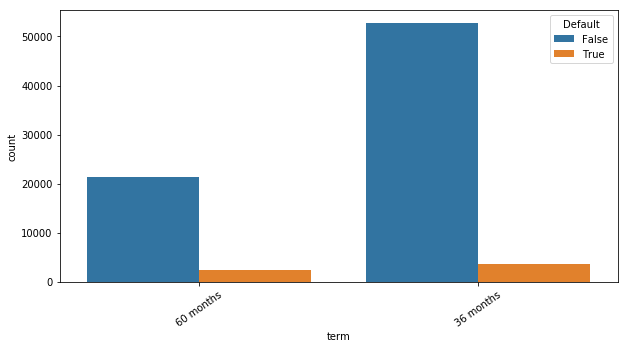

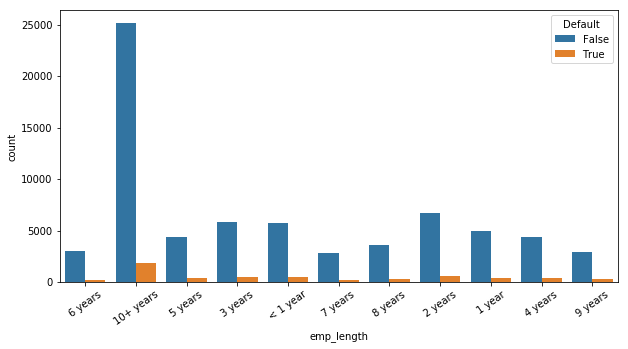

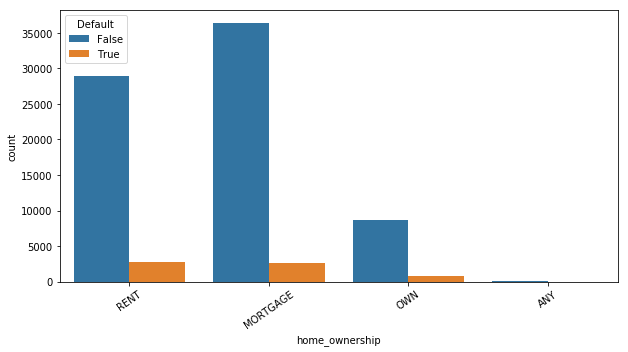

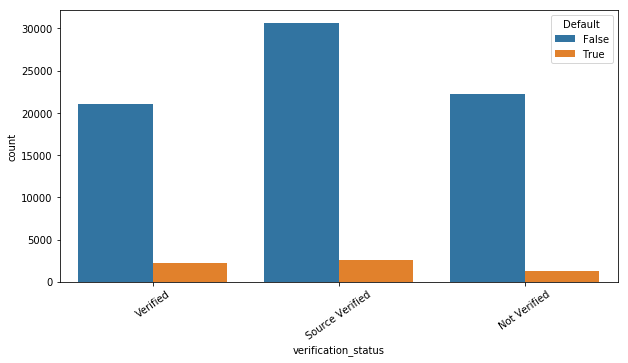

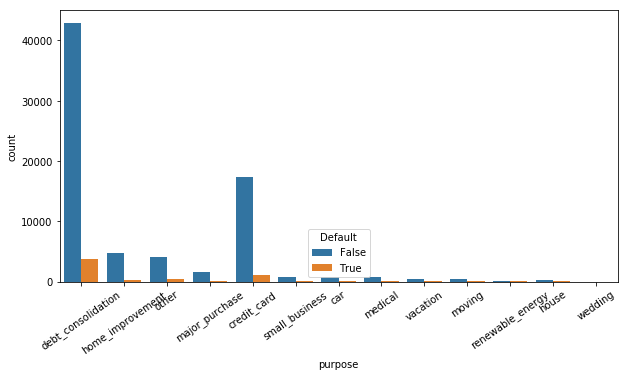

In [4]:
## plot categorical feature Vs class
def plotCatFeature(ft):
    tmp = df[[ft, "Default"]]
    tmp["count"] = tmp.groupby([ft,"Default"])[ft].transform("count")
    plt.figure(figsize = (10,5))
    plt.xticks(rotation=35)
    sns.barplot(x = ft, y = "count", hue = "Default", data = tmp)
    plt.show()

    
cat_features = ["term", "emp_length", "home_ownership", "verification_status","purpose"]
for ft in cat_features:
    plotCatFeature(ft)

It's hard to just eyeball the figures and catch the group that has a significant higher default chance, except for *RENT* compared with *MORTGAGE* and *OWN*.

### Continuous features

We plot the continuous features and see if there is any significant mean difference between *"Default"* and *"Non-default"* cases. Some credit-history related features have very obvious different means in default versus non-default loans, such as the fico score range at the time of application, last reported fico score, and number of credit credit inquiries in past 12 month at the time of the application.

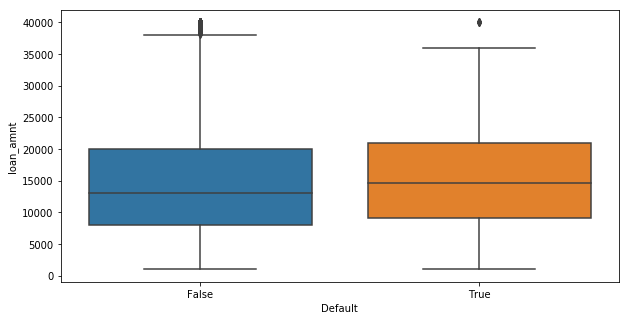

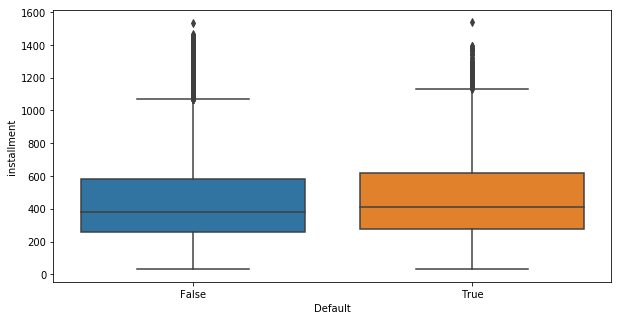

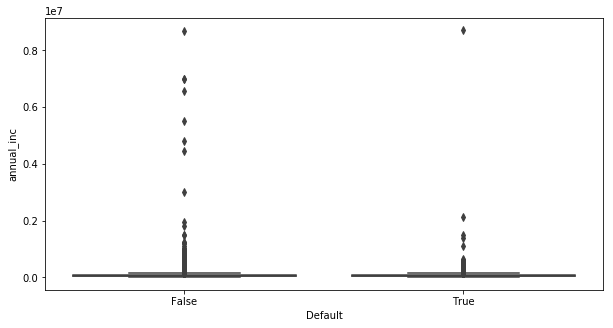

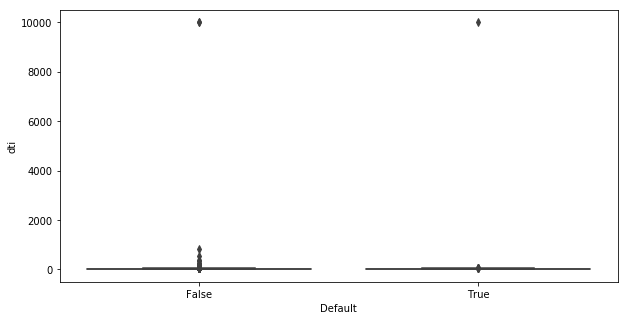

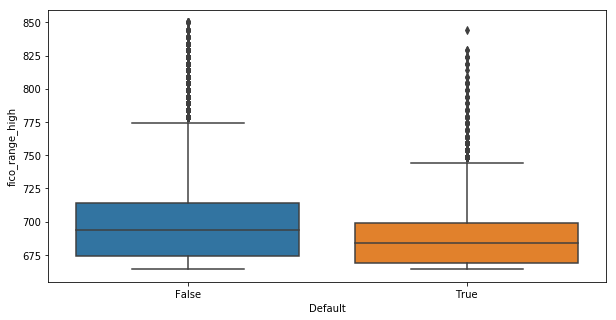

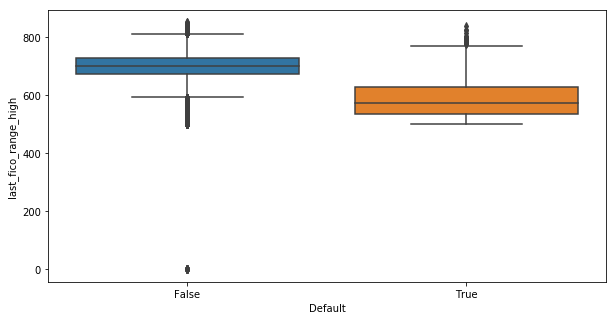

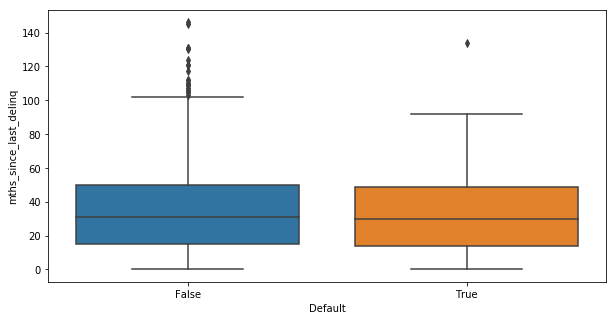

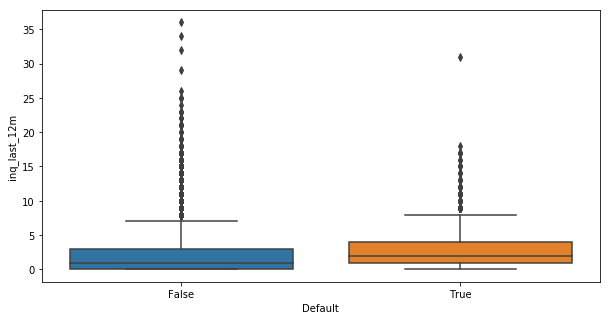

In [5]:
# plot continuous features
def plotContFeature(ft):
    plt.figure(figsize = (10,5))
    sns.boxplot(x="Default", y =ft, data=df)
    plt.show()
    
contFeatures = ["loan_amnt","installment","annual_inc","dti","fico_range_high",
                "last_fico_range_high", "mths_since_last_delinq","inq_last_12m"]

for ft in contFeatures:
    plotContFeature(ft)

## 2. Data preparation

### Derive additional variables from raw features
Since some raw features are recorded in a form that cannot be directly fed into a model (datetime columns), we need to convert them into new columns (categorical or numeric). 
For example, for the datetime features (i.e., "issue_d", "earliest_cr_line", "last_credit_pull_d"), we create a credit history variable ("cr_hist"), which is the # of month between "issue_d", and "earliest_cr_line", as well as a pull history variable (“issue2pull”), which is defined as the # of month between “last_credit_pull_d" and "issue_d". Potentially, these credit history - related numeric variables could help in our loan default prediction.

In [6]:
# data preparation
# time cols
cols_dt = ["issue_d", "earliest_cr_line", "last_credit_pull_d"]
for c in cols_dt:
    df[c] = pd.to_datetime(df[c])

# create a credit history variable = the # of month between issue_d and earliest_cr_line
df["cr_hist"] = (df["issue_d"] - df["earliest_cr_line"])/ np.timedelta64(1, 'M')

# create a pull history variable = the # of month between last_credit_pull_d and issue_d and
# Fill in missing issue2pull by mean
df["issue2pull"] = (df["last_credit_pull_d"] - df["issue_d"])/ np.timedelta64(1, 'M')    
df["issue2pull"] = df["issue2pull"].fillna(df["issue2pull"].median())

### Fill missing values
We choose to use the most naïve approach to deal with missing values. That is, we fill categorical missing values with the most frequent value among all non-missing cases, and fill numeric missing values with the median of all non-missing values. Arguably we could use more sophisticated imputation methods to fill these NAs, but we simply don’t choose to over-optimize the data cleaning process too soon.
At this step, we also noticed a potential data quality issue, the DTI ratio (“dti”) has some 9999 values, and these rows also have zero income (“annual_inc”). They are more likely to be NAs than actual recorded values, so we choose to replace them with their respective medians.

In [7]:
# note that the outliers, "annual_inc":[0,1,1], "dti",[9999]
# print(sorted(df["annual_inc"].tolist()))

#replace them with mean values, could do more careful imputations if time permits
annual_inc_mean = df[df["dti"]!=9999]["annual_inc"].mean()
dti_mean = df[df["dti"]!=9999]["dti"].mean()
dti_outlier = df["dti"] == 9999
df.loc[dti_outlier, "annual_inc"] = annual_inc_mean
df.loc[dti_outlier, "dti"] = dti_mean


# Fill in missing emp_length by most frequent or mean
emp_length_top = df["emp_length"].value_counts().index[0]
df["emp_length"] = df["emp_length"].fillna(emp_length_top)

In [8]:
# change data type from float to int if necessary
mcols = ["mths_since_last_delinq","mths_since_last_record", "inq_last_12m"]
for c in mcols:
    df[c] = df[c].fillna(df[c].median())

### Convert categorical features
Finally, we apply one-hot encoding to convert all categorical features. After this step, the dataset is ready to be fed into most classification algorithms directly.

In [9]:
# one-hot encoding categorical features
cat_cols = ["term", "emp_length", "home_ownership", "verification_status",
           "purpose", "addr_state"]
for col in cat_cols:
    df = df.join(pd.get_dummies(df[col], 
                                  prefix=col,
                                  drop_first=True))
    df.drop(col, axis = 1, inplace = True)

In [10]:
# drop redundant cols
red_cols = ["id","issue_d", "loan_status", "earliest_cr_line", "last_credit_pull_d"]
for c in red_cols:
    df.drop(c, axis = 1, inplace = True)

## 3. Predictive Modeling

We have a textbook example of classification task, so most of the widely used classification methods should be able to help us. Of course every method has its pros and cons. For example, SVM does not scale well, especially with respect to the number of training points. Unlike SVM, Logistic Regression requires well balanced classes, which in our case appears to be an issue (<10% of default cases).  Given the relatively large number of features we’ve got, I would assume tree-based models would work well, as they could capture the interactions among all the features, and ensemble methods such as Random Forest or Gradient Boosting Tree works even better in lowering model variance or/and bias.

First, we use stratified split method to create a training and testing set. We try SVM, LR, Random Forest, and Gradient Boosting Tree models on the training set with default sklearn hyper-parameters. 3-fold cross-validation prediction performances are reported as follows:

In [22]:
## Training a model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, confusion_matrix
# precision_score, recall_score, f1_score

In [12]:
split = StratifiedShuffleSplit(test_size = 0.1, random_state=42)
for train_index, test_index in split.split(df, df["Default"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]
    
X_train, y_train = df_train.drop("Default", axis = 1), df_train["Default"]
X_test, y_test = df_test.drop("Default", axis = 1), df_test["Default"]

Model performance on the training set using 5-fold cross-validation:

Classifier: LinearSVC
             precision    recall  f1-score   support

      False       0.96      0.95      0.96     66567
       True       0.46      0.49      0.48      5433

avg / total       0.92      0.92      0.92     72000



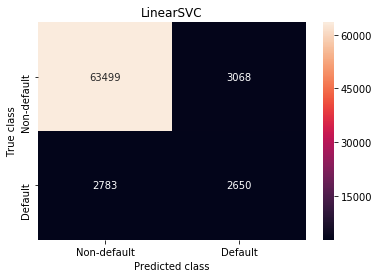


Classifier: LogisticRegression
             precision    recall  f1-score   support

      False       0.96      0.99      0.97     66567
       True       0.77      0.52      0.62      5433

avg / total       0.95      0.95      0.95     72000



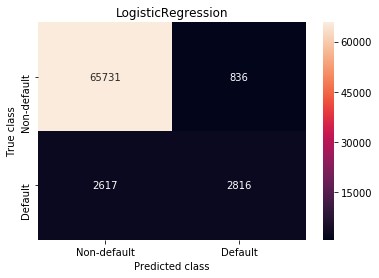


Classifier: RandomForestClassifier
             precision    recall  f1-score   support

      False       0.96      0.99      0.97     66567
       True       0.75      0.50      0.60      5433

avg / total       0.94      0.95      0.94     72000



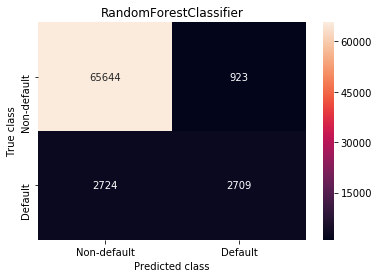


Classifier: GradientBoostingClassifier
             precision    recall  f1-score   support

      False       0.97      0.98      0.98     66567
       True       0.75      0.58      0.65      5433

avg / total       0.95      0.95      0.95     72000



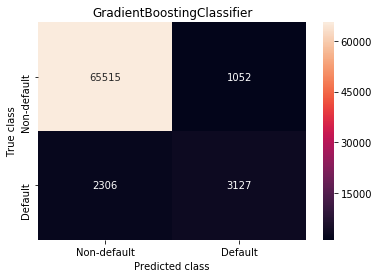

In [13]:
clf_svc = LinearSVC()
clf_lr = LogisticRegression()
clf_rf = RandomForestClassifier(bootstrap = False)
clf_gbt = GradientBoostingClassifier()


print("Model performance on the training set using 5-fold cross-validation:")
y_train_score, auc = {}, {}
for clf in [clf_svc, clf_lr, clf_rf, clf_gbt]:
    clf_name = clf.__class__.__name__
    print("\nClassifier: {}".format(clf_name ))
    if clf == clf_svc:
        auc[clf_name] = None
    else:
        y_train_probas = cross_val_predict(clf, X_train, y_train, 
                                           cv = 5,
                                           n_jobs = -1,
                                           method = "predict_proba")
        y_train_score[clf_name] = y_train_probas[:,1]
        auc[clf_name] = roc_auc_score(y_train, y_train_score[clf_name])
    
    y_train_pred = cross_val_predict(clf, X_train, y_train, 
                                     cv = 5, n_jobs = -1,
                                    method = "predict")
    print(classification_report(y_train, y_train_pred))
    clf_cm = confusion_matrix(y_train, y_train_pred)
    plt.figure()
    sns.heatmap(clf_cm, annot=True, fmt = ".0f",
                xticklabels = ["Non-default", "Default"], 
                yticklabels = ["Non-default", "Default"] )
    plt.ylabel("True class")
    plt.xlabel("Predicted class")
    plt.title("{}".format(clf_name ))
    plt.show()   

Although all performance values shown above could be improved via hyper-parameter tuning, it already gives us a sense of the potentials for these models. Remember that the main focus of our model is to pick out potential loan default cases, which means that the recall score of the *True* class is our first priority. 

Overall, Linear SVM clearly suffers poor predictability, and it already has the longest training time among all models. Logistic Regression has very good performances, but as we can see from its confusion matrix and *True* class precision and recall scores, it favors precision over recall due to the several class imbalances in our dataset. Random Forest mainly reduces the variance of the decision tree models, in terms of model biases, especially on the positive cases (default loans), it does not seem to be the most promising choice.

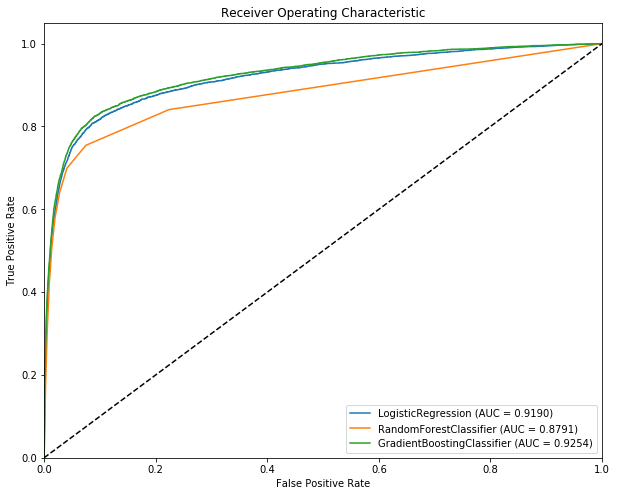

In [14]:
# plot the ROC curves
plt.figure(figsize = (10,8))
for clf in [clf_lr, clf_rf, clf_gbt]:
    clf_name = clf.__class__.__name__
    fpr, tpr, _ = roc_curve(y_train, y_train_score[clf_name])

    plt.plot(fpr, tpr, 
             label="%s (AUC = %0.4f)" %(clf_name, auc[clf_name]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

The ROC curve also shows that the Gradient Boosting Classifier has a slight edge against Logistic Regression, and both GBT and LR models are significantly better than SVC.

We choose Gradient Boosting Tree (GBT) Classifier as our selected method due to its superior performance in almost all the listed metrics. Notice that Recall should be considered more important than precision here, as our goal is to prevent default loans as much as possible. The superiority of GBT makes sense because boosting methods iteratively increase the overall accuracy and focuses on the misclassified cases in previous rounds. 

## Model fine-tuning

In [18]:
# GBT classifier is slightly better, especially in Recall score
# Now let's do some rough fine-tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[0.02, 0.05, 0.1],
    'n_estimators':[20, 50, 100], 
    'max_depth':[3, 5, 8],
    'max_features':["sqrt", None], 
}


Since we are more concerned about recall score of the *Default* class, we will use it as the performance metric in hyper-parameter tuning.

In [19]:
gbt = GradientBoostingClassifier()
grid_search = GridSearchCV(gbt, param_grid, scoring="recall", n_jobs = -1, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.02, 0.05, 0.1], 'n_estimators': [20, 50, 100], 'max_depth': [3, 5, 8], 'max_features': ['sqrt', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [20]:
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_score = clf.predict_proba(X_train)[:,1]
gbt_auc = roc_auc_score(y_train, y_train_score)
    
y_train_pred = clf.predict(X_train)
gbt_accuracy = accuracy_score(y_train, y_train_pred)
gbt_precision = precision_score(y_train, y_train_pred)
gbt_recall= recall_score(y_train, y_train_pred)
gbt_f1 = f1_score(y_train, y_train_pred) 
print("CV selected GBT model, performance on the training set")
print("AUC:{:2.4f}, Accuracy:{:2.4f}, Precision:{:2.4f}, Recall:{:2.4f}, F1 score:{:2.4f}\n".format(
        gbt_auc, gbt_accuracy, gbt_precision, gbt_recall, gbt_f1))    

CV selected GBT model, performance on the training set
AUC:0.9287, Accuracy:0.9540, Precision:0.7391, Recall:0.6039, F1 score:0.6647



## Feature selection 

One of the advantages of the tree-based models is their interpretability. Instead of using methods such as forward/backward/subset selection as in regression analysis or shrinkage methods such as LASSO for feature selection, we can select variables by exploring the feature importance of the fitted GBT model.
As shown below, we plot part of the relative feature importance (compared to the maximum feature score) that are ≥0. The features with the highest importance include fico scores, “installment”, “dti”, “loan_amnt”, etc. Notice that the time features we derived (i.e., “issue2pull”, “cr_hist”) also made important contributions.

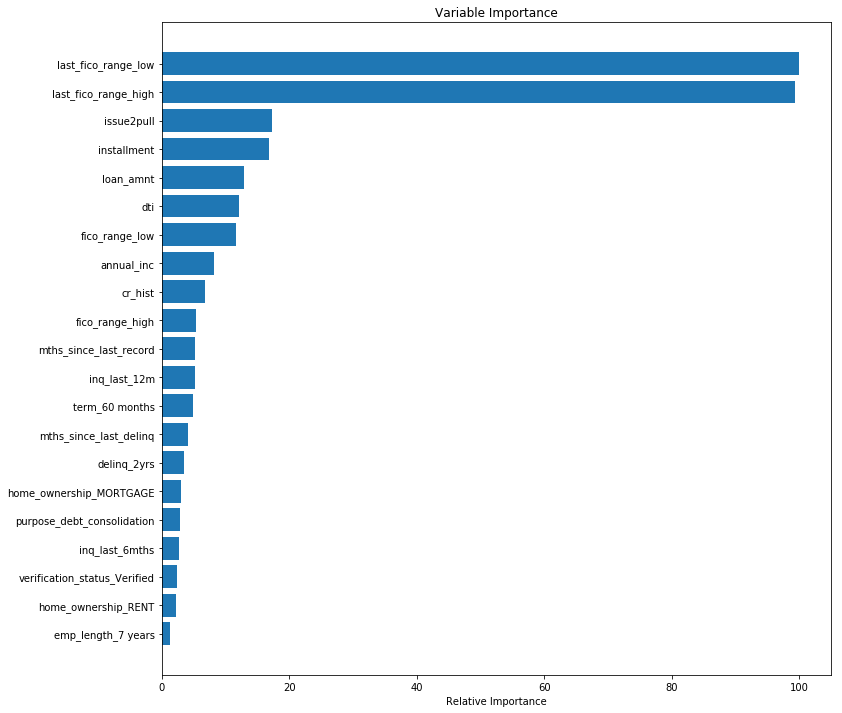

In [25]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[73:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 12))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [26]:
# select features with only positive importance, estimate the final performance on the testing set
selected_cols = list(X_train.columns[sorted_idx])

In [27]:
print("Original # features: {}, After feature selection: {}".format(X_train.shape[1], len(selected_cols)))

Original # features: 94, After feature selection: 21


In [28]:
Xs_train, Xs_test = X_train[selected_cols], X_test[selected_cols]

In [29]:
clf.fit(Xs_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Performance evaluation

As shown below, the model performance on the testing set is comparable to the training set performance, which indicates good generalization power of the selected model.

Test set performance
             precision    recall  f1-score   support

      False       0.96      0.98      0.97      7396
       True       0.74      0.56      0.64       604

avg / total       0.95      0.95      0.95      8000



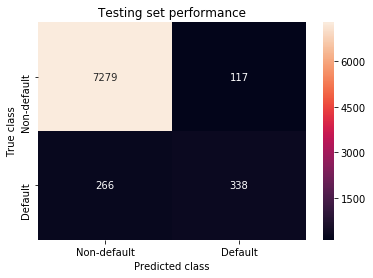

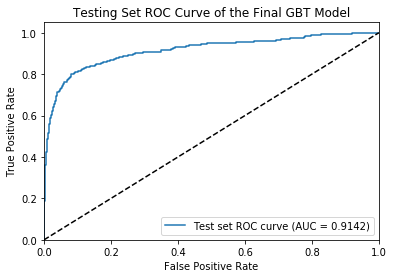

In [30]:
ys_test_pred = clf.predict(Xs_test)

ys_test_score = clf.predict_proba(Xs_test)[:,1]
test_auc = roc_auc_score(y_test, ys_test_score)
print("Test set performance")
print(classification_report(y_test, ys_test_pred))
clf_cm = confusion_matrix(y_test, ys_test_pred)
plt.figure()
sns.heatmap(clf_cm, annot=True, fmt = ".0f",
            xticklabels = ["Non-default", "Default"], 
            yticklabels = ["Non-default", "Default"] )
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.title("Testing set performance")
plt.show() 


fpr, tpr, _ = roc_curve(y_test, ys_test_score)

plt.figure()
plt.plot(fpr, tpr, 
         label='Test set ROC curve (AUC = %0.4f)' % test_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Set ROC Curve of the Final GBT Model')
plt.legend(loc="lower right")
plt.show()

### Class imbalance issue
We've got a fairly good model, but the recall ($56.34\%$) could still use some improvements. Theoretically, we could put more weights to positive classes when training any models. In practice, bagging methods are more natural to be applied with under-sampling when building each individual tree classifiers. Off-the-shelf APIs such as [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html) already implemented a variety of prototypes that are consistent with scikit-learn.

In [40]:
from imblearn.combine import SMOTEENN

# Apply SMOTE + ENN
# SMOTE: Synthetic Minority Over-sampling Technique
# https://www.jair.org/media/953/live-953-2037-jair.pdf
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(Xs_train, y_train)

In [41]:
clf.fit(X_resampled, y_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Test set performance with re-balanced training
             precision    recall  f1-score   support

      False       0.98      0.95      0.96      7396
       True       0.55      0.73      0.63       604

avg / total       0.94      0.93      0.94      8000



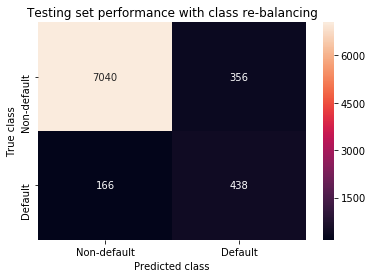

In [42]:
ys_test_pred_rb = clf.predict(Xs_test)

ys_test_score_rb = clf.predict_proba(Xs_test)[:,1]
test_auc_rb = roc_auc_score(y_test, ys_test_score_rb)

print("Test set performance with re-balanced training")
print(classification_report(y_test, ys_test_pred_rb))
clf_cm_rb = confusion_matrix(y_test, ys_test_pred_rb)
plt.figure()
sns.heatmap(clf_cm_rb, annot=True, fmt = ".0f",
            xticklabels = ["Non-default", "Default"], 
            yticklabels = ["Non-default", "Default"] )
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.title("Testing set performance with class re-balancing")
plt.show() 

The prediction on the *Default* class (Recall) has been improved from $56.34\%$ to $73.38\%$, although other metrics such as Precision has been slightly sacrificed. Notice that we simply use the best model selected and fine-tuned using the original training set. We could expect some extra performance boost by applying the re-balanceearlier in our pipeline.

## 4.Summary
In this project, we’ve explored how to use machine learning to predict personal loan defaults. What I particularly like about this dataset and project is how we can derive and create credit-history related features from the raw measurements, and how we carefully picked the performance metric for model selection, and finally, how we took a crack at the class imbalance issue using rebalancing. 

This is definitely not the end of our exploration. Besides more extensive study of class-rebalancing techniques and model selection (can we reduce the *True* class precision and recall a bit more?), other potential extensions for this project include external data collection and integration, such as exploring how macroeconomic data could help to improve our model.
